# <div align="center" style="padding: 15px; background-color: #FFA07A; color: white; font-weight: bold; border-radius: 10px; font-family: Times New Roman, sans-serif;">PS4E4 | Abalone Regression Dataset</div>

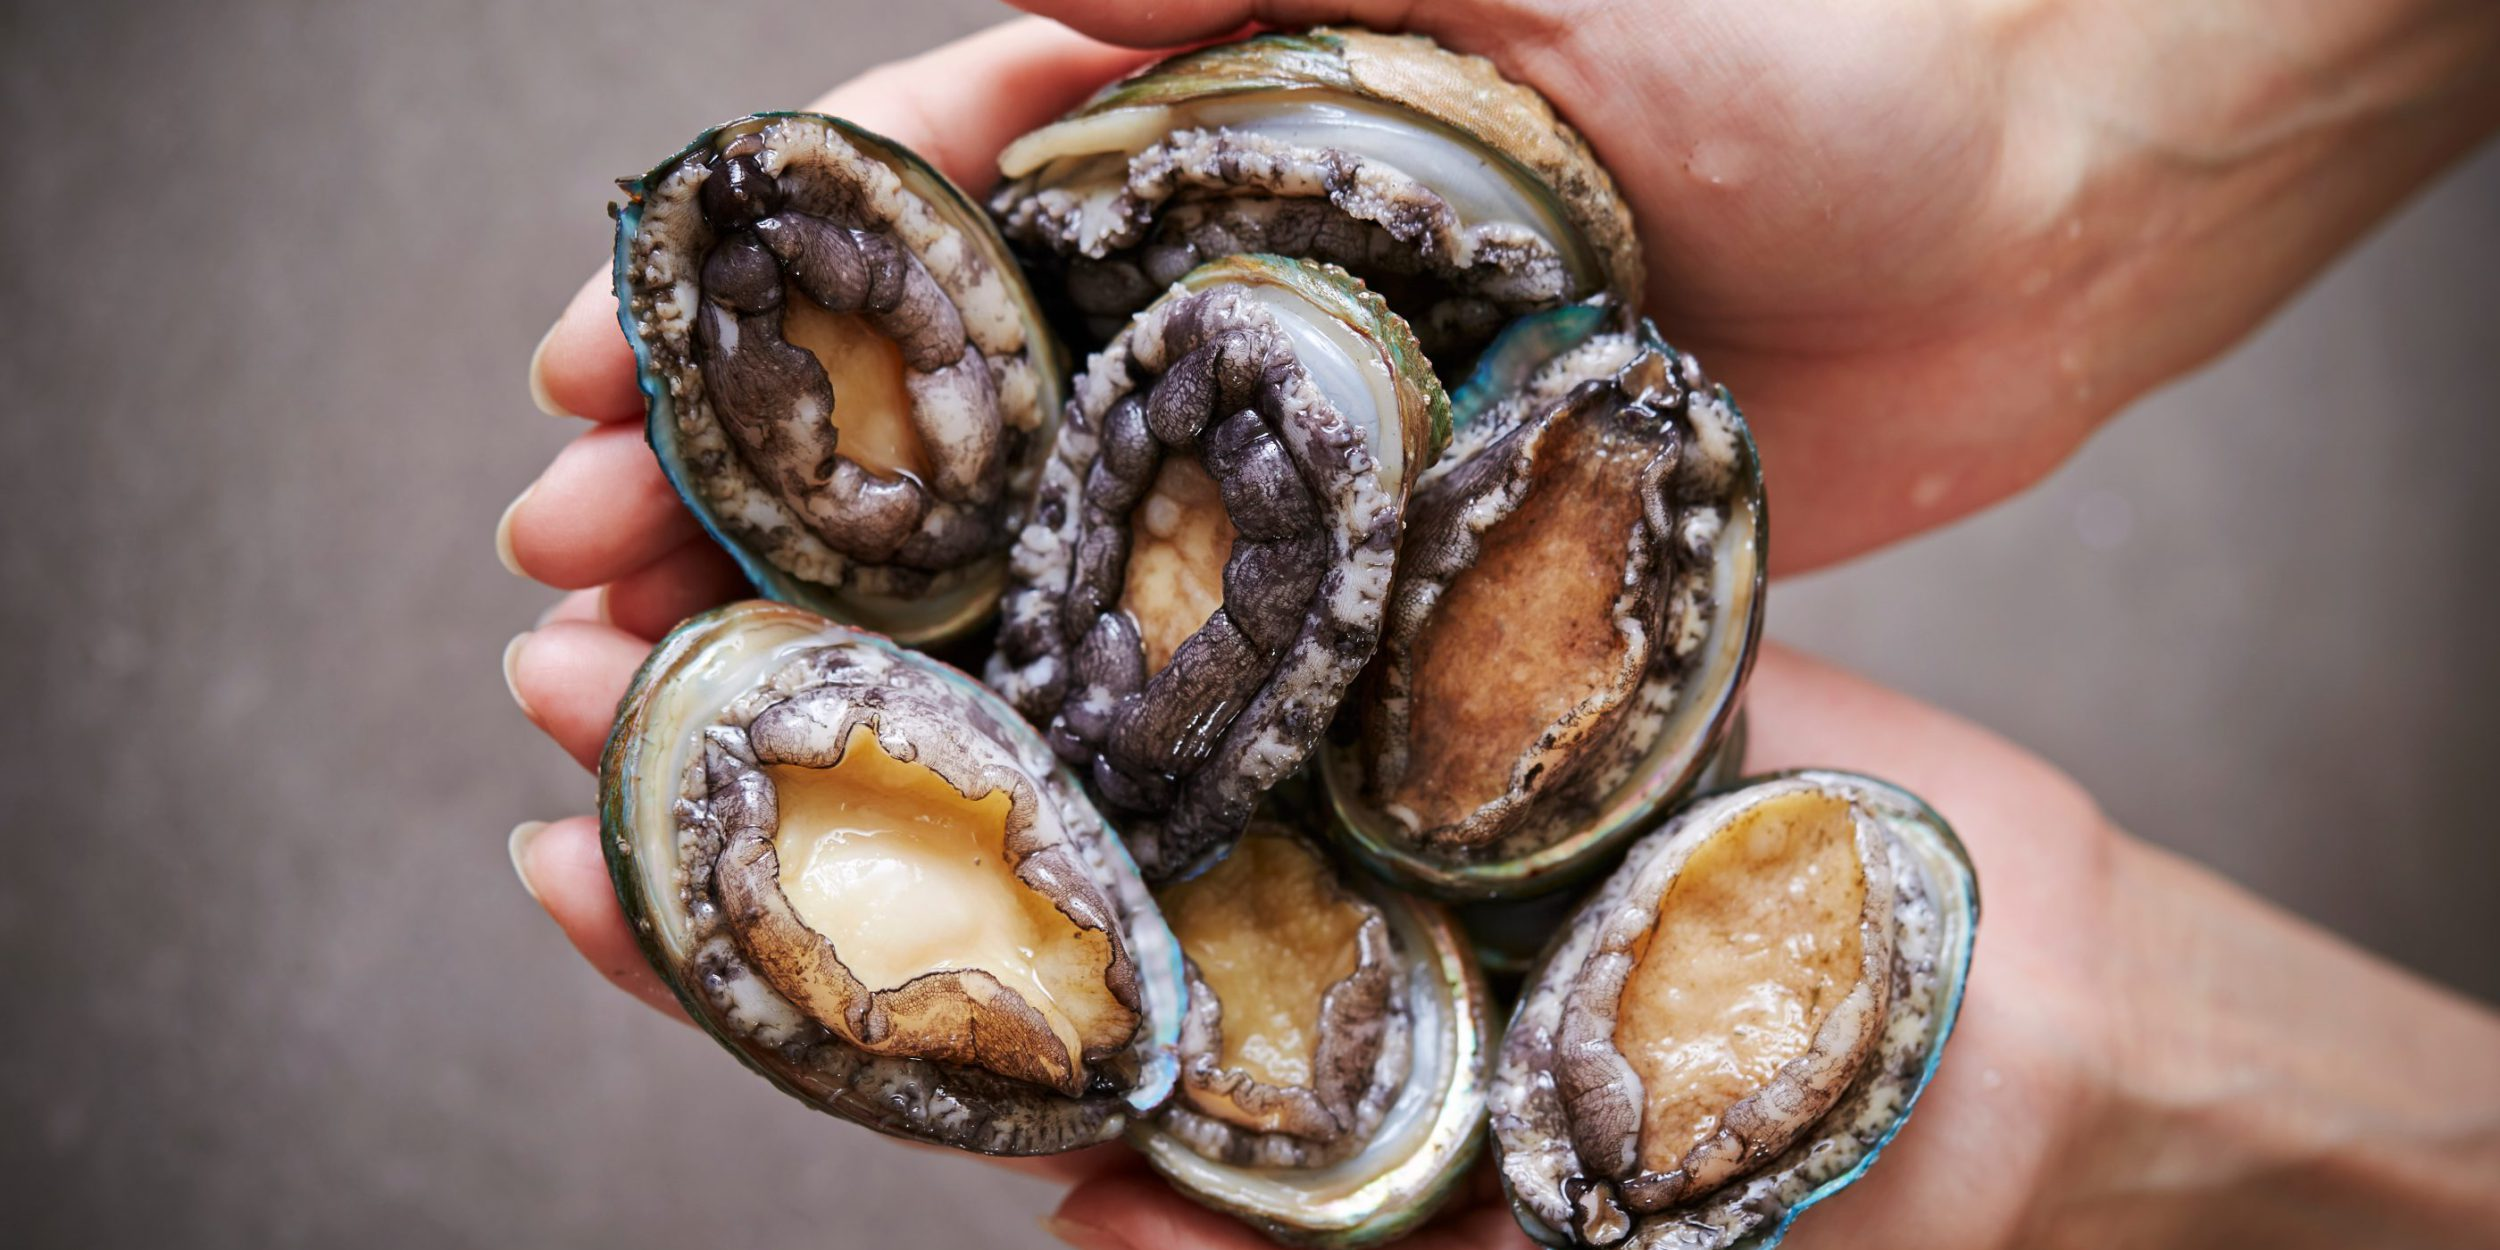


## <div align="center" style="color: #FFA07A; font-family: Times New Roman, sans-serif;font-weight:bold; border-radius:10px;">Introduction</div>

<p style="color:darkgray;">
This notebook explores the abalone dataset, which contains information about the age of abalone. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.
</p>

## <div align="center" style="color: #FFA07A; font-family: Times New Roman, sans-serif;font-weight:bold; border-radius:10px;">Data Description</div>

<p style="color:darkgray;">
The dataset consists of various measurements of abalone, including features such as length, diameter, height, and weight. These measurements are used as predictors to estimate the age of abalone. Additionally, categorical features such as sex are included in the dataset. The target variable, 'Rings', represents the age of abalone and is predicted based on the other features.
</p>


| Feature         | Type       | Description                            | Unit         | Categorical |
|-----------------|------------|----------------------------------------|--------------|-------------|
| Sex             | Categorical| M, F, and I (infant)                   |              | Yes         |
| Length          | Continuous | Longest shell measurement              | mm           | No          |
| Diameter        | Continuous | Perpendicular to length                | mm           | No          |
| Height          | Continuous | With meat in shell                     | mm           | No          |
| Whole_weight    | Continuous | Whole abalone                          | grams        | No          |
| Shucked_weight  | Continuous | Weight of meat                         | grams        | No          |
| Viscera_weight  | Continuous | Gut weight (after bleeding)           | grams        | No          |
| Shell_weight    | Continuous | After being dried                      | grams        | No          |
| Rings           | Integer    | +1.5 gives the age in years           |              | No          |

Reference: [Abalone Dataset](https://archive.ics.uci.edu/dataset/1/abalone)

## <div align="center" style="color: #FFA07A; font-family: Times New Roman, sans-serif;font-weight:bold; border-radius:10px;">Approach</div>

<ul style="color:darkgray;">
    <li>Data loading and exploration: Load the dataset and perform initial exploration to understand its structure and content.</li>
    <li>Exploratory data analysis (EDA): Visualize the relationships between variables and gain insights into the data.</li>
    <li>Data preprocessing: Handle missing values, perform feature engineering, and prepare the data for modeling.</li>
    <li>Model building: Train and evaluate machine learning models to predict the age of abalone.</li>
    <li>Model evaluation: Assess the performance of the models using appropriate evaluation metrics such as accuracy, RMSLE, etc.</li>
</ul>

## <div align="center" style="color: #FFA07A; font-family: Times New Roman, sans-serif;font-weight:bold; border-radius:10px;">Changes this version: </div>
<ul style="color:darkgray;">
    <li>Added the original data to improve performance.</li>
    <li>Dealt with the skewness transformation problem.</li>
    <li>Removed MinMaxScaling.</li>
    <li>Hyperparameter tuned LGBM model which achieved the best RMSLE so far on the LB.</li>
</ul>

## <div align="center" style="color: #FFA07A; font-family: Times New Roman, sans-serif;font-weight:bold; border-radius:10px;">If you find the notebook helpful make sure to upvote! Your support is appreciated.</div>
    
    


# <div align="center" style="padding: 10px; background-color: #FFA07A;font-family: Times New Roman, sans-serif; color: white; font-weight: bold; border-radius: 10px;">Imports</div>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_palette("tab10", n_colors=None, desat=None, color_codes=False)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import optuna
from sklearn.model_selection import cross_val_score

# <div align="center" style="padding: 10px; background-color: #FFA07A; font-family: Times New Roman, sans-serif; color: white; font-weight: bold; border-radius: 10px;">Exploratory data analysis</div>

In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s4e4/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s4e4/test.csv")
original=pd.read_csv("/kaggle/input/abalone-dataset/abalone.csv")
submission=pd.read_csv("/kaggle/input/playground-series-s4e4/sample_submission.csv")

In [3]:
df

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


Renaming the weight columns to their original names, so it is easier to differentiate between them.

In [4]:
df.rename(columns={'Whole weight.1': 'Shucked_weight'}, inplace=True)
df.rename(columns={'Whole weight.2': 'Viscera_weight'}, inplace=True)
df.rename(columns={'Whole weight': 'Whole_weight'}, inplace=True)
df.rename(columns={'Shell weight': 'Shell_weight'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole_weight    90615 non-null  float64
 6   Shucked_weight  90615 non-null  float64
 7   Viscera_weight  90615 non-null  float64
 8   Shell_weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


Checking if there are any duplicates.

In [6]:
df.duplicated().sum()

0

Checking null values for `df`,`test` and `original` dataframes.

In [7]:
def check_nulls(datasets):
    for name, data in datasets.items():
        null_count = data.isnull().sum()
        if null_count.sum() == 0:
            print(f"No null values found in {name} dataset.")
        else:
            print(f"Null values in {name} dataset:")
            null_info = pd.DataFrame({'Column': null_count.index, 'Null Count': null_count.values})
            print(null_info)
            print("\n")
            
datasets = {
    'df': df,
    'test': test,
    'original': original
}

In [8]:
check_nulls(datasets)

No null values found in df dataset.
No null values found in test dataset.
No null values found in original dataset.


----------------------------------------------------------------------------

In [9]:
df.describe()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000



 
- **Abalone Characteristics**:
  - The mean length of abalones is approximately 0.517 mm, with moderate variability.
  - The mean diameter is approximately 0.402 mm, also showing moderate variability.
  - The mean height is approximately 0.135 mm, with relatively low variability.
  - The mean number of rings (age) is approximately 9.70 years, with considerable variability.

- **Size Distribution**:
  - Abalones in the dataset range from 0.075 mm to 0.815 mm in length, indicating a wide size range.

- **Age Distribution**:
  - Abalones in the dataset range from 1 to 29 years old, covering various age groups.


----------------------------------------------------------------------------

Dropping the `id` column as it has no value to us.

In [10]:
df.drop('id',axis=1,inplace=True)

Let's check the original data available at UCI which will help us when training the model. The more data we have the better the results!

Reference: https://www.kaggle.com/competitions/playground-series-s4e4/discussion/488075

In [11]:
original

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [12]:
original.duplicated().sum()

0

In [13]:
original.rename(columns={'Shucked weight': 'Shucked_weight'}, inplace=True)
original.rename(columns={'Viscera weight': 'Viscera_weight'}, inplace=True)
original.rename(columns={'Whole weight': 'Whole_weight'}, inplace=True)
original.rename(columns={'Shell weight': 'Shell_weight'}, inplace=True)

Now, let's concatenate the two dataframes with each other.

In [14]:
df = pd.concat([df, original], ignore_index=True)

In [15]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
94787,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
94788,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
94789,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
94790,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [16]:
df.drop_duplicates(inplace=True)

----------------------------------------------------------------------------

## <div align="center" style="color: #FFA07A; font-family: Times New Roman, sans-serif;font-weight:bold; border-radius:10px;">Visualization</div>

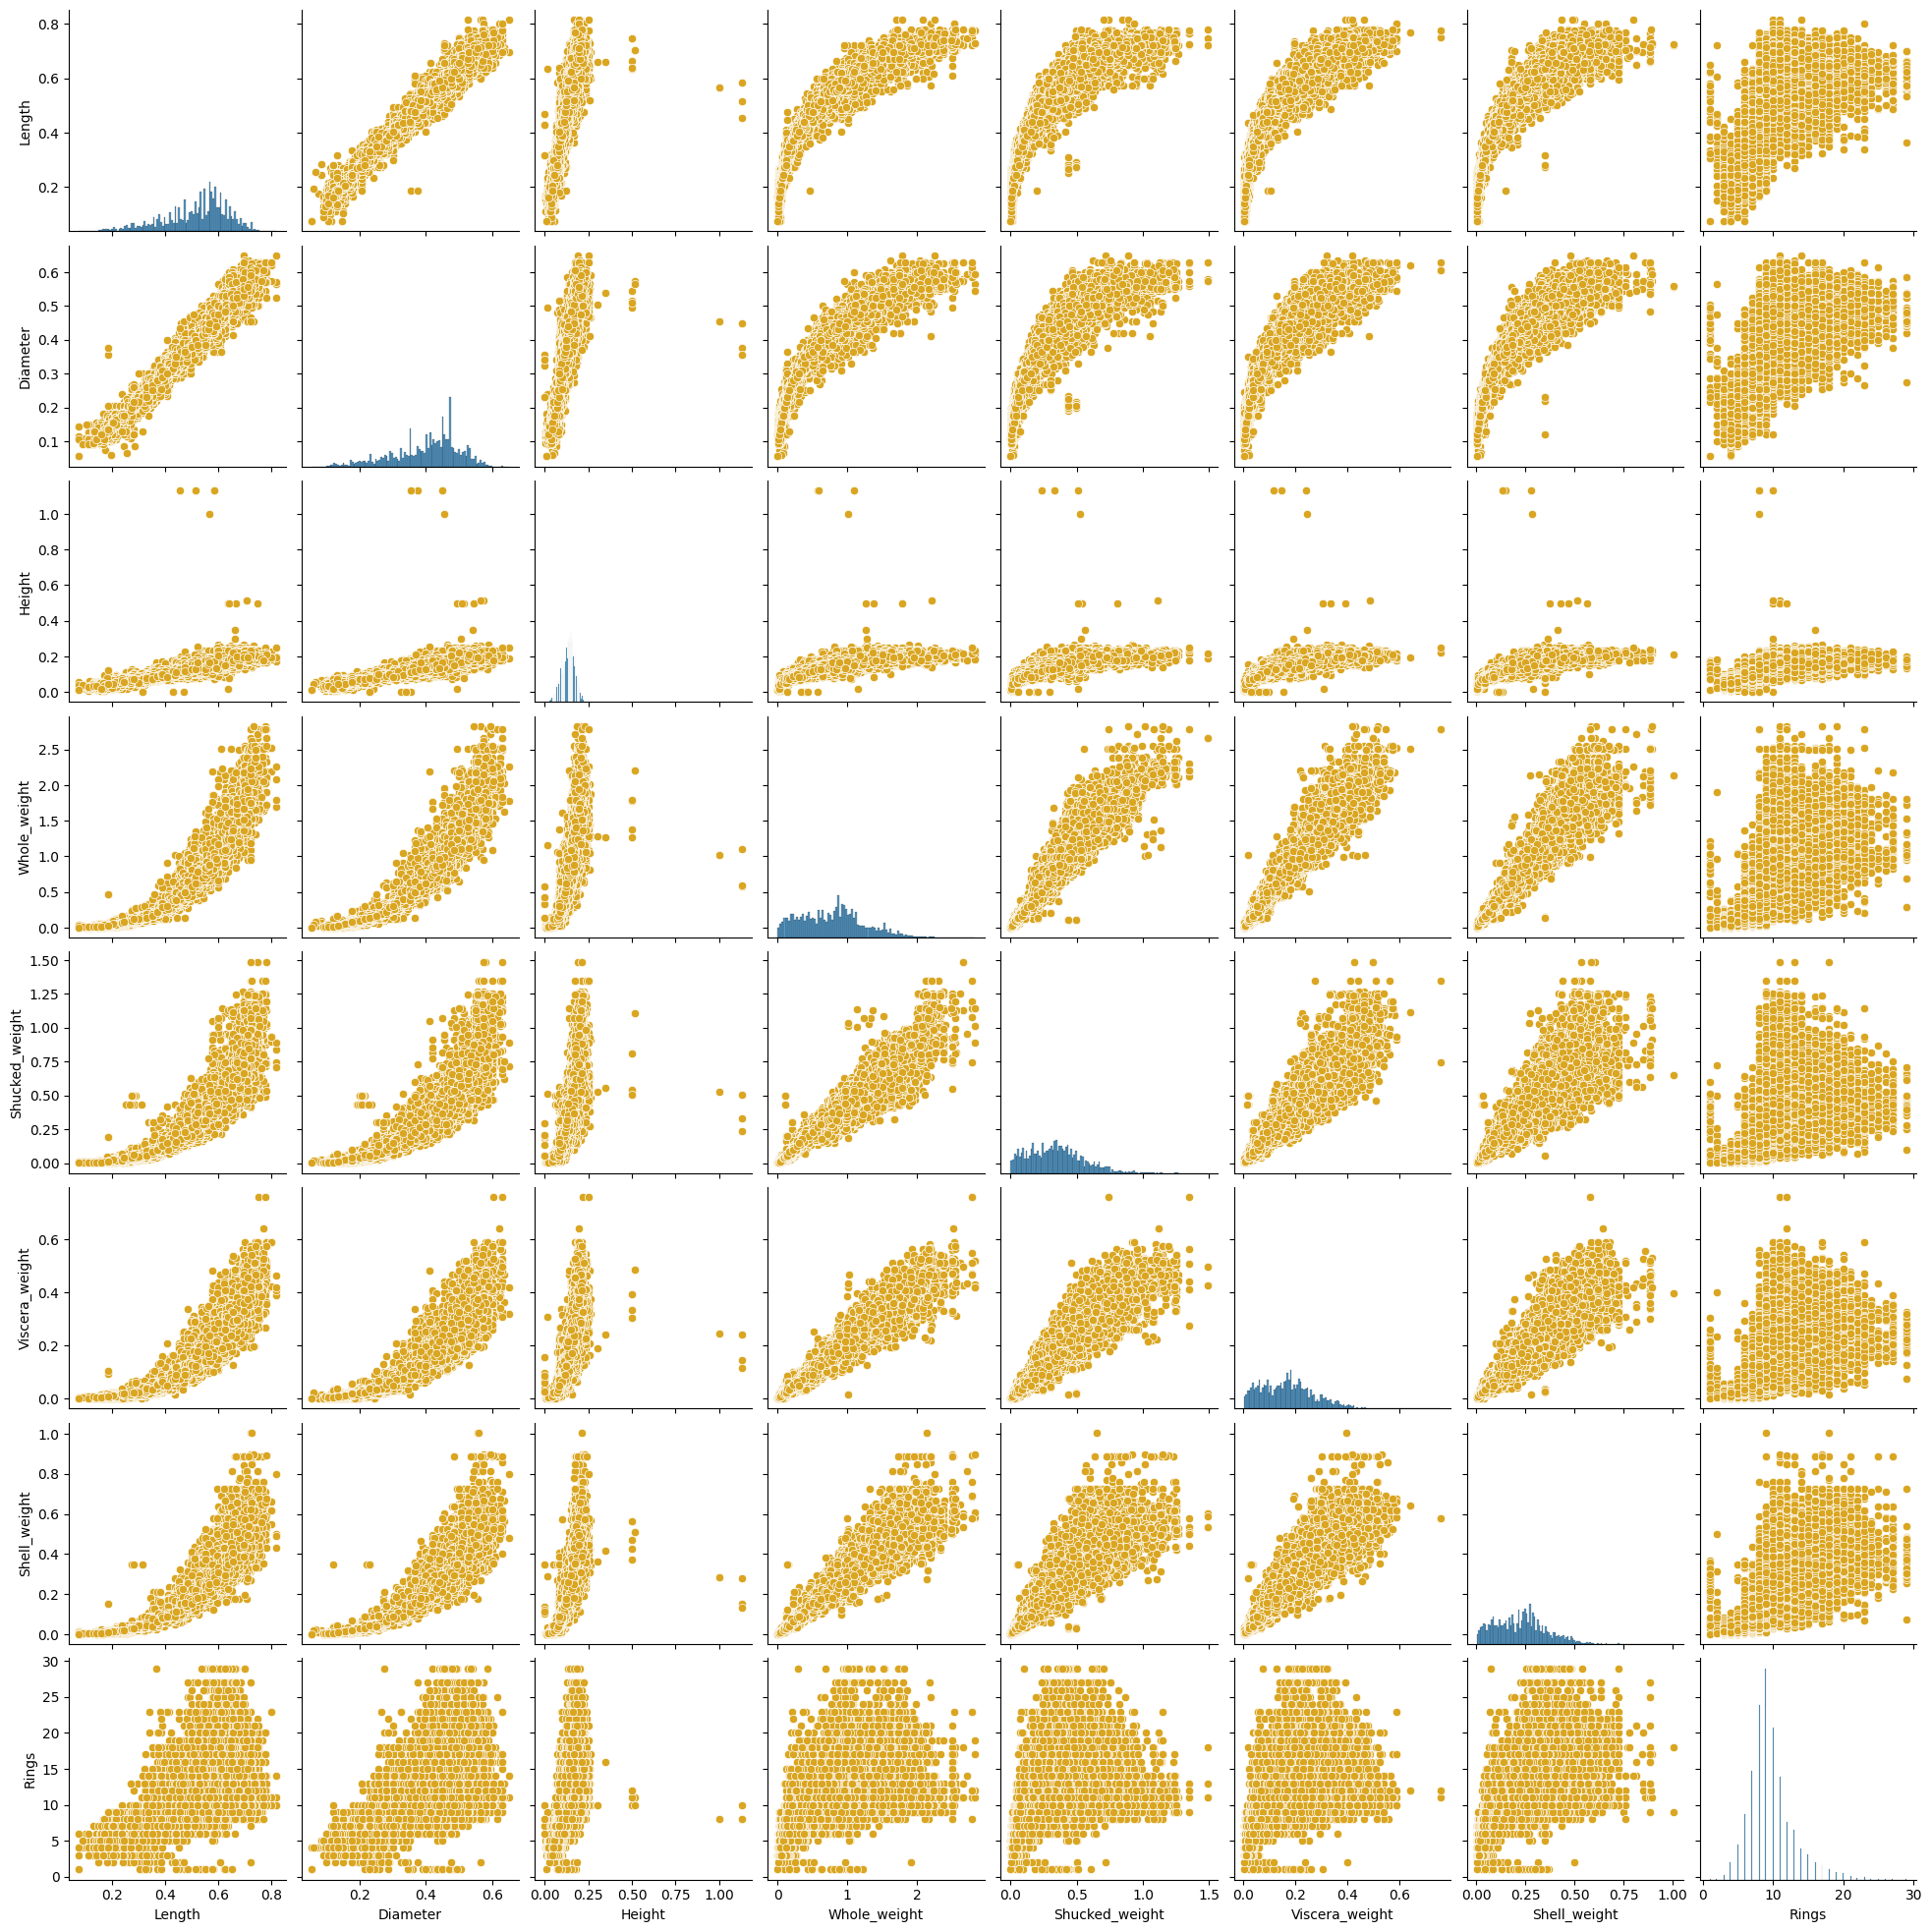

In [17]:
goldenrod_color = '#DAA520' 

sns.pairplot(data=df, plot_kws={'color': goldenrod_color})
plt.show()

Upon inspecting the pairplot, several notable relationships stand out:
- There appears to be an exponential correlation between the 'Length' of the abalone and its weight, as well as between the `Diameter` and weight.
- The weights exhibit a linear relationship among themselves.
- Some outliers are visible  `Height` variable.

----------------------------------------------------------------------------

***Let's check the distribution and skewness of each variable.***

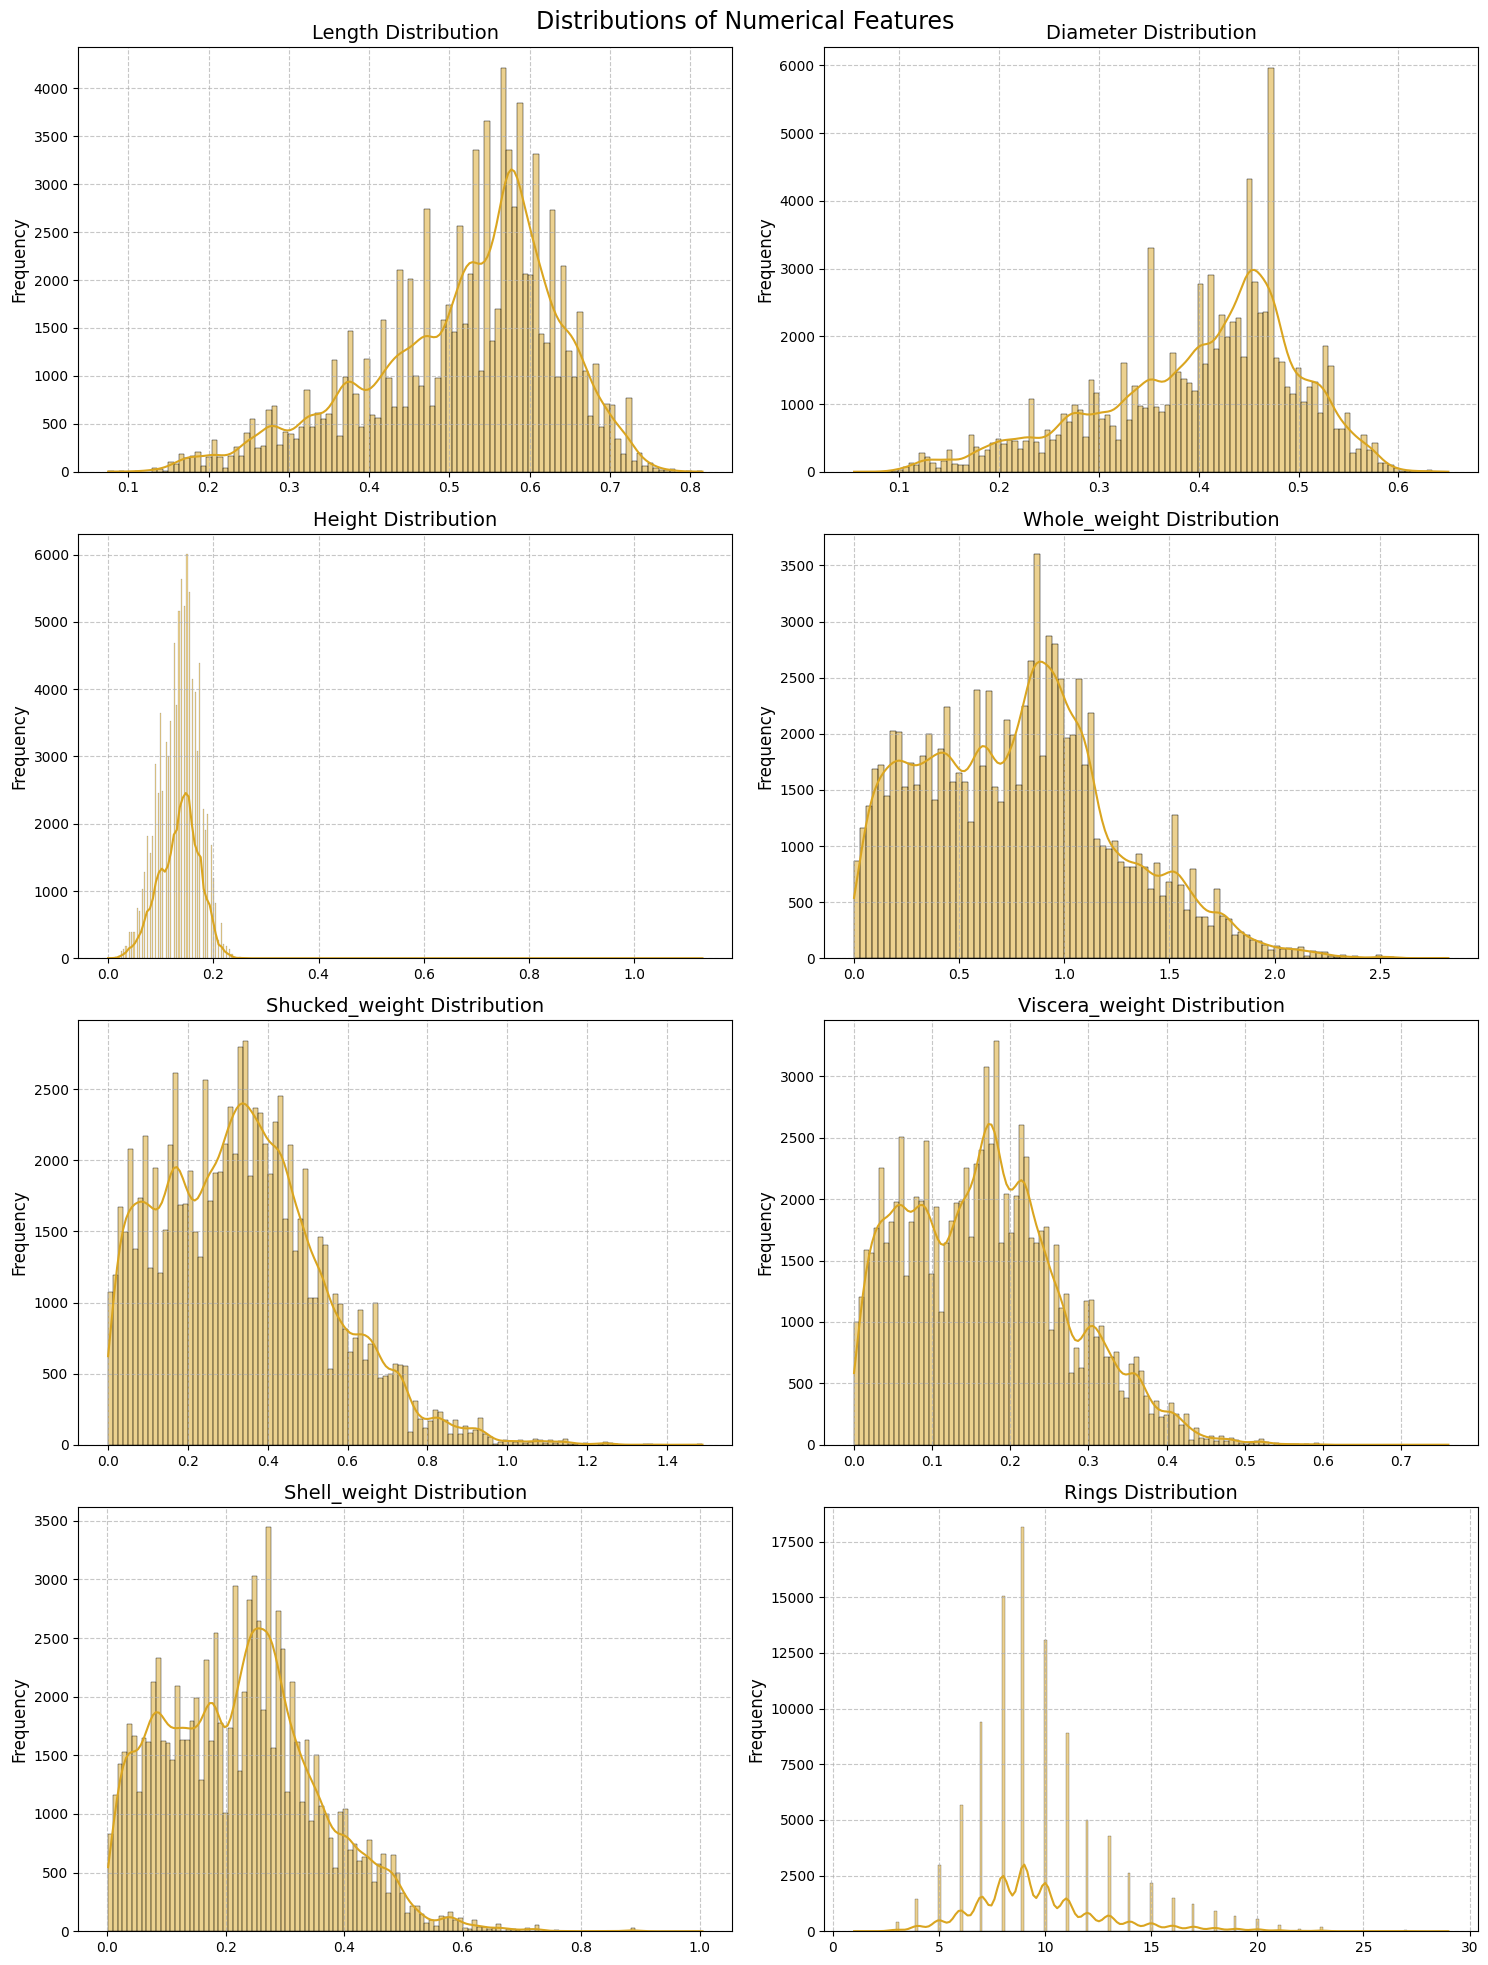

In [18]:
numerical_features = df.select_dtypes(include=['int', 'float']).columns

plots_per_row = 2
num_rows = (len(numerical_features) + plots_per_row - 1) // plots_per_row
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, ax=axes[i], kde=True, color='Goldenrod')
    axes[i].set_title(f'{feature} Distribution', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)

for i in range(len(numerical_features), num_rows * plots_per_row):
    fig.delaxes(axes[i])
    
fig.suptitle('Distributions of Numerical Features', fontsize=17)
plt.tight_layout()
plt.show()

In [19]:
skewness = df[numerical_features].skew()

print("Skewness of Features:")
for feature, skew in skewness.items():
    print(f"{feature}: {skew:.4f}")

Skewness of Features:
Length: -0.7274
Diameter: -0.6909
Height: 0.4758
Whole_weight: 0.4363
Shucked_weight: 0.6011
Viscera_weight: 0.4855
Shell_weight: 0.4883
Rings: 1.2000


Here are some insights from the distribution of the numerical features:

- The majority of the Length of the abalones seems to be in the range of 0.4 to 0.7, peaking at around 0.6.

- The Height of the abalones ranges from 0 to 0.2.

- The highest peak of Diameter is between 0.4 and 0.5.

- The majority of the abalones are aged between 7 and 10 years old, with a peak at age 9.

- From these distribution plots and calculating the skewness, we can see that all the variables are a little bit skewed, but don't actually need transforming except for the target variable `Rings`, whose skewness can cause inaccuracy. We can try to deal with this and see if it improves the results.

----------------------------------------------------------------------------

***Plotting boxplots for numerical features to look for outliers.***

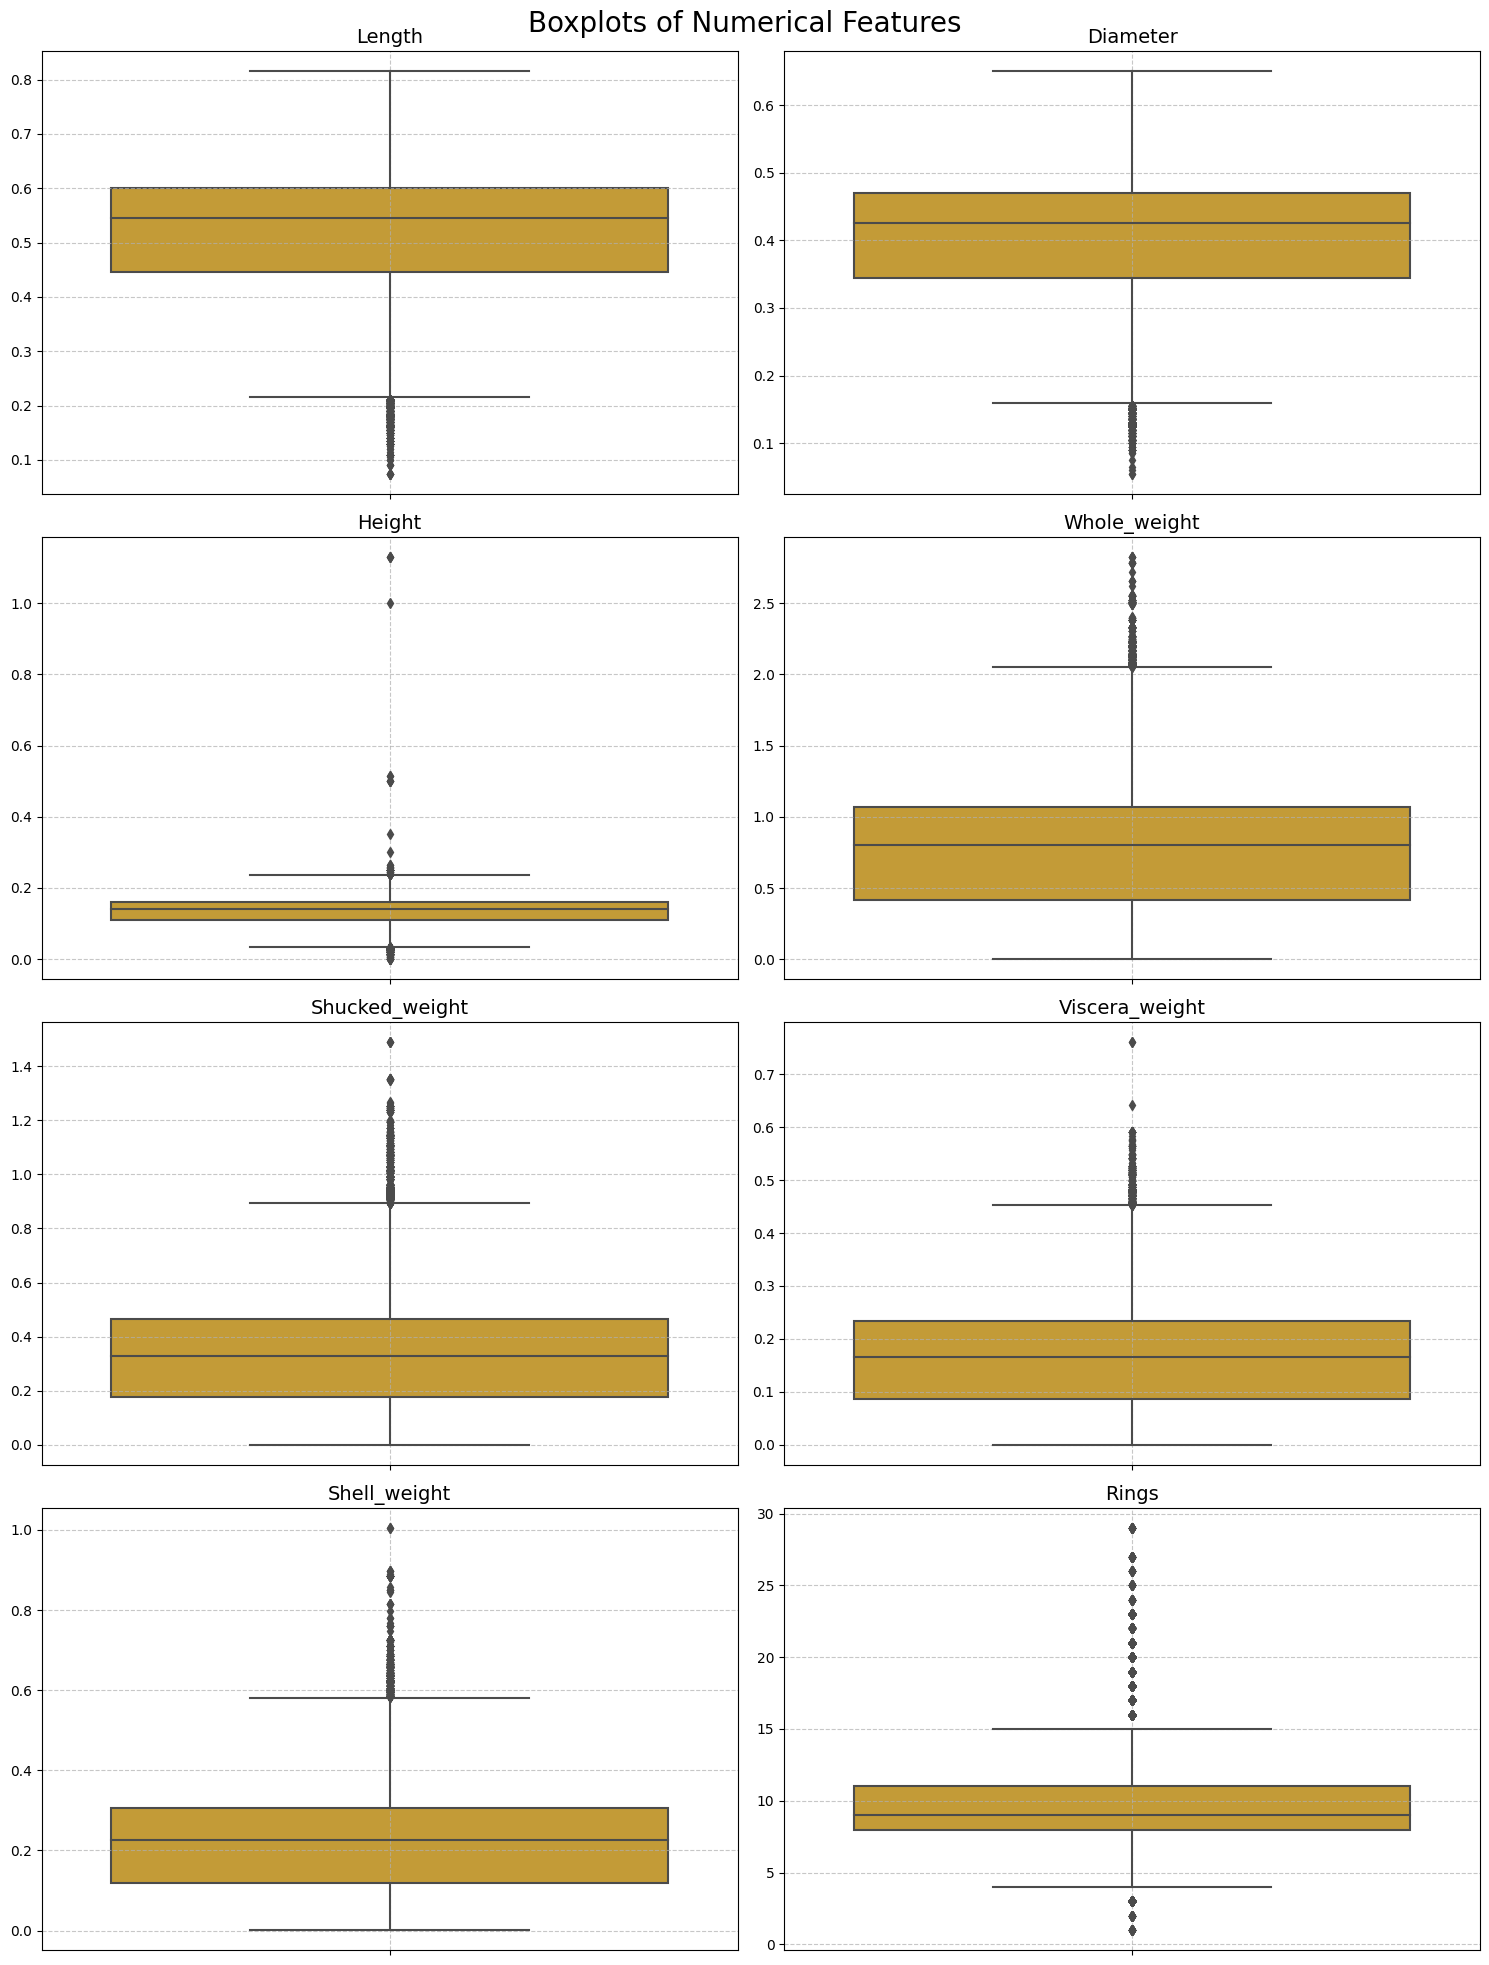

In [20]:
plots_per_row = 2
num_rows = (len(numerical_features) + plots_per_row - 1) // plots_per_row
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, y=feature, ax=axes[i], color='Goldenrod')
    axes[i].set_title(feature, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)

for i in range(len(numerical_features), num_rows * plots_per_row):
    fig.delaxes(axes[i])

fig.suptitle('Boxplots of Numerical Features', fontsize=20)

plt.tight_layout()
plt.show()


Outliers in these plots highlight instances of unusual measurements that stand out from the typical data range. These could be due to natural variation, unique cases, or potential errors in data collection. It’s important that we consider these factors when interpreting the data.

----------------------------------------------------------------------------

Let's take a lot on the `Sex` feature using a countplot.

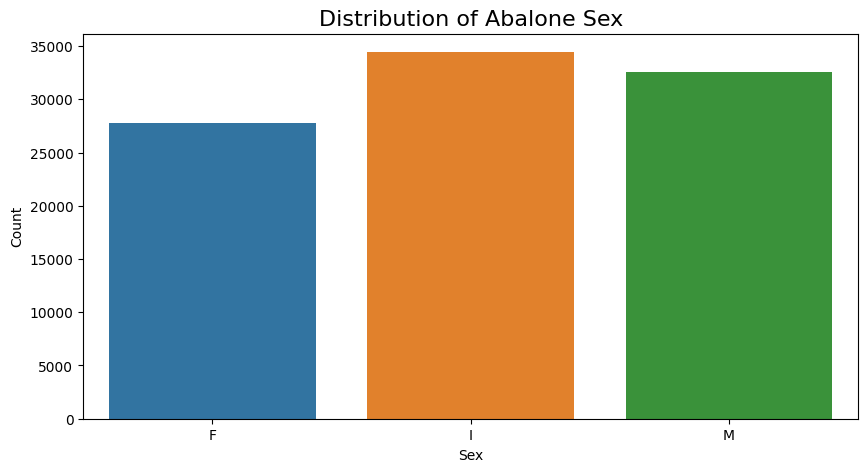

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Sex')

plt.title('Distribution of Abalone Sex', fontsize=16)
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()


`Infants` are the most occuring sex, while `Females` are the least occuring.

----------------------------------------------------------------------------

Let's take a look on the confusion matrix.

In [22]:
df_corr=df.drop('Sex',axis=1)

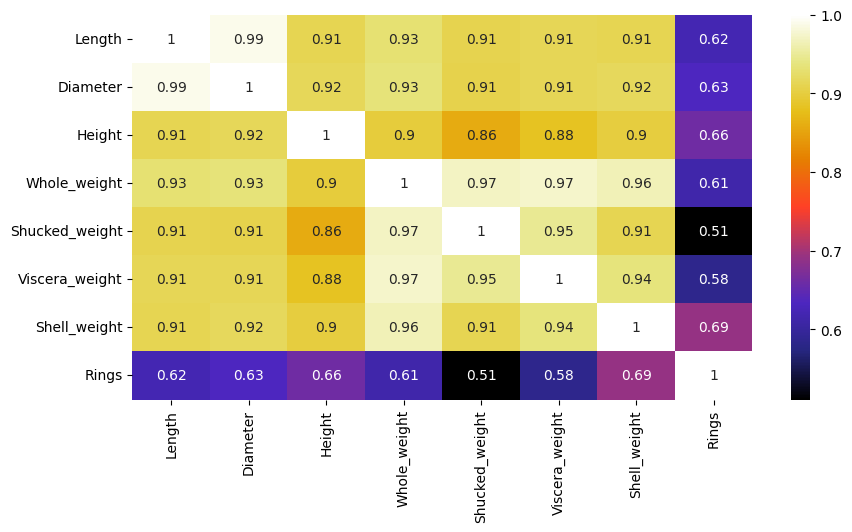

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df_corr.corr(),annot=True,cmap='CMRmap')
plt.show()

- We can see that all the features are highly correlated with the `target`.
- Overall there is a high collinearity between the features which might cause problems.

# <div align="center" style="padding: 10px; background-color: #FFA07A;font-family: Times New Roman, sans-serif; color: white; font-weight: bold; border-radius: 10px;">Feature Engineering & Encoding</div>

First, we need to encode the `Sex` feature using `get_dummies` function to make all our features numerical.

In [24]:
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
df[['Sex_F','Sex_M','Sex_I']] = df[['Sex_F','Sex_M','Sex_I']].astype(int) #Transforming the values to 0s and 1s instead of true and false

Applying log transformation (used for positively skewed variables) for the target `Rings`.

In [25]:
#Applying log transformation to positively skewed features
features_to_transform = ['Rings']
for feature in features_to_transform:
    df[feature] = np.log1p(df[feature])


# <div align="center" style="padding: 10px; background-color: #FFA07A;font-family: Times New Roman, sans-serif; color: white; font-weight: bold; border-radius: 10px;">Models</div>

In [26]:
X=df.drop('Rings',axis=1)
y=df['Rings']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

--------------------------------------

## <div align="center" style="color: #FFA07A; font-family: Times New Roman, sans-serif;font-weight:bold; border-radius:10px;">Baseline Models</div>


Let's try some baseline models and see which of them are perfoming well, so that we can choose which models to tune.

In [29]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Support Vector Regression", SVR()),
    ("XGBoost", XGBRegressor()),
    ("LightGBM", LGBMRegressor()),
    ("CatBoost", CatBoostRegressor(verbose=0)) 
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmsle_score = rmsle(y_test, y_pred)
    
    print(f"{name}: RMSLE = {rmsle_score}")


Linear Regression: RMSLE = 0.1664359106062669
Ridge Regression: RMSLE = 0.1665065605613653
Lasso Regression: RMSLE = 0.2857883410987623
Decision Tree: RMSLE = 0.21476999887555995
Random Forest: RMSLE = 0.1535716358523222
Gradient Boosting: RMSLE = 0.15484692142713483
Support Vector Regression: RMSLE = 0.15557310867492968
XGBoost: RMSLE = 0.15131855898792704
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 75833, number of used features: 10
[LightGBM] [Info] Start training from score 2.330406
LightGBM: RMSLE = 0.1512328820035245
CatBoost: RMSLE = 0.15001568994679074


## <div align="center" style="color: #FFA07A; font-family: Times New Roman, sans-serif;font-weight:bold; border-radius:10px;">Hyperparameter Tuned Models</div>


In [30]:
# def objective_lgbm(trial):
#     lgbm_params = {
#     'objective': 'regression',  
#     'n_estimators': trial.suggest_int('n_estimators', 100, 1000),  
#     'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),  
#     'max_depth': trial.suggest_int('max_depth', 5, 20),  
#     'num_leaves': trial.suggest_int('num_leaves', 10, 100),  
#     'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),  
#     'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#     'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#     'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#     'verbosity': -1  
# }

#     lgbm_model = LGBMRegressor(**lgbm_params)
#     lgbm_scores = -cross_val_score(lgbm_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#     rmsle_score = np.sqrt(lgbm_scores).mean()
#     print(f"Trial RMSLE: {rmsle_score}")
#     return rmsle_score

# study_lgbm = optuna.create_study(direction='minimize')
# study_lgbm.optimize(objective_lgbm, n_trials=100)

# best_lgbm_params = study_lgbm.best_params
# best_lgbm_model = LGBMRegressor(**best_lgbm_params)
# best_lgbm_model.fit(X_train, y_train)  
# y_pred = best_lgbm_model.predict(X_test)  

# best_lgbm_score = rmsle (y_test, y_pred)
# print("Best Parameters for LightGBM:")
# print(best_lgbm_params)
# print("Best Score for LightGBM:", best_lgbm_score)

# print("RMSLE for LightGBM:", rmsle(y_test, y_pred))


In [31]:
best_params={'n_estimators': 701,
             'learning_rate': 0.03182764893525044, 
             'max_depth': 16, 
             'num_leaves': 72, 
             'min_child_samples': 31, 
             'subsample': 0.5458392207775161, 
             'colsample_bytree': 0.7150103531990785, 
             'reg_alpha': 0.9985541681701147, 
             'reg_lambda': 0.47831823132452245}

In [32]:
lgbm_model = LGBMRegressor(**best_params,verbosity=-1)
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

r2_lgbm = lgbm_model.score(X_test, y_test)
rmsle_lgbm = rmsle(y_test, y_pred_lgbm)

print(f"LightGBM Regression R^2 Score: {r2_lgbm:.4f}")
print(f"LightGBM Regression RMSLE: {rmsle_lgbm:.4f}")

LightGBM Regression R^2 Score: 0.7283
LightGBM Regression RMSLE: 0.1490


# <div align="center" style="padding: 10px; background-color: #FFA07A;font-family: Times New Roman, sans-serif; color: white; font-weight: bold; border-radius: 10px;">Test Script</div>

Applying the same preprocessing done on `df` to the `test.csv`

In [33]:
def preprocess_test(df):
    
    df.rename(columns={'Whole weight.1': 'Shucked_weight'}, inplace=True)
    df.rename(columns={'Whole weight.2': 'Viscera_weight'}, inplace=True)
    df.rename(columns={'Whole weight': 'Whole_weight'}, inplace=True)
    df.rename(columns={'Shell weight': 'Shell_weight'}, inplace=True)

    df.drop('id',axis=1,inplace=True)
    df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
    
    df[['Sex_F','Sex_M','Sex_I']] = df[['Sex_F','Sex_M','Sex_I']].astype(int)


    return df

In [34]:
test=preprocess_test(test)

# <div align="center" style="padding: 10px; background-color: #FFA07A; font-family: Times New Roman, sans-serif; color: white; font-weight: bold; border-radius: 10px;">Submission</div>

In [35]:
predictions=lgbm_model.predict(test)
predictions=np.expm1(predictions) # Reverting the target back to normal so we can so the actual results with any type of tranformation or scaling

In [36]:
submission = pd.DataFrame({
    'id': submission.id,
    'Rings': predictions
})


In [37]:
submission

,id,Rings
0,90615,9.868435
1,90616,9.869909
2,90617,9.982225
3,90618,10.515944
4,90619,7.626278
...,...,...
60406,151021,6.361226
60407,151022,9.434077
60408,151023,12.137472
60409,151024,14.417239


In [38]:
submission.to_csv('submission.csv',index=False)

## <div align="center" style="color: #FFA07A; font-family: Times New Roman, sans-serif;font-weight:bold; border-radius:10px;">Next steps:</div>

<ul style="color:darkgray;">
    <li>Detecting and removing outliers.</li>
    <li>Trying different models with hyperparameter tuning.</li>
    <li>Creating a voting classifier between the top performing models.</li>
</ul>